In [1]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from matplotlib import image
from matplotlib import pyplot as plt

Using TensorFlow backend.


# 2. Read and transform mnist and notMNIST datasets

In [84]:
def transform_picture_dataset(X, y, show_test=False):
    side_size = X.shape[1]
    if len(X.shape) == 2:
        side_size = int(np.sqrt(side_size))
    X = X.reshape((-1, side_size, side_size, 1))
    
    y, classes = pd.factorize(y)
    y = to_categorical(pd.factorize(y)[0], num_classes=10)
    if show_test:
        print(f'First label: {np.argmax(y[0, :])}\n'
              f'First image: ')
        plt.imshow(X[0, :, :, 0])
        plt.show()
        
    return X, y, classes

In [3]:
mnist = pd.read_csv('mnist.csv')
mnist.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


First label: 0
First image: 


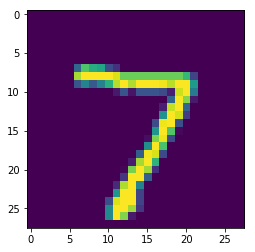

In [85]:
mnist_X, mnist_y, _ = transform_picture_dataset(mnist.drop(columns=['label']).values,
                          mnist.label.values,
                          show_test=True)

In [93]:
not_mnist_X = []
not_mnist_y = []
path = 'notMNIST_small/'
for r, d, f in os.walk('notMNIST_small/'):
    for file in f:
        try:
            not_mnist_X.append(image.imread(r + '/' + file))
            not_mnist_y.append(r[-1])
        except:
            print('Error occured while reading', r + file)
        

Error occured while reading notMNIST_small/ARGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png
Error occured while reading notMNIST_small/FQ3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png


First label: 0
First image: 


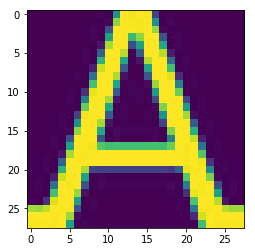

In [94]:
not_mnist_X, not_mnist_y, letters = transform_picture_dataset(np.asarray(not_mnist_X),
                                                     np.asarray(not_mnist_y),
                                                     show_test=True)

# 3. CNN for mnist

In [63]:
class CNN():
    def __init__(self, activation):
        self.activation = activation
        self.__model = Sequential()
        self.__history = None
        
    def train(self, X, y, n_epoch, batch_size, verbose=0, optimizer='rmsprop'):
        self.__init_model(X[0].shape)
        self.__model.compile(optimizer=optimizer,
                             loss='categorical_crossentropy')
        self.__history = self.__model.fit(X, y, epochs=n_epoch, batch_size=batch_size,
                                         verbose=verbose)
        
    def __init_model(self, shape):
        self.__model.add(Conv2D(8, kernel_size=3, activation=self.activation, 
                               input_shape=shape))
        for _ in range(2):
            self.__model.add(Conv2D(8, kernel_size=3, activation=self.activation))
        self.__model.add(Flatten())
        for _ in range(2):
            self.__model.add(Dense(64, activation=self.activation))
        self.__model.add(Dense(10, activation='softmax'))
        
    def plot_epochs_loss(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.__history.epoch, self.__history.history['loss'])
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title('Loss on train')
        plt.show()
        
    def test(self, X, y):
        predict = self.__model.predict(X)
        true_classes = np.argmax(y, axis=1)
        pred_classes = np.argmax(predict, axis=1)
        
        for c in np.unique(true_classes):
            print(f'Accuracy for class {c}: {accuracy_score(true_classes == c, pred_classes == c)}')

In [8]:
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y,
                                                                            shuffle=True,
                                                                            test_size=0.3,
                                                                            stratify=np.argmax(mnist_y, axis=1))

### Sigmoid activation

In [61]:
sigmoid_cnn = CNN('sigmoid')

In [62]:
sigmoid_cnn.train(mnist_X_train, mnist_y_train, 30, 100)

In [64]:
sigmoid_cnn.test(mnist_X_test, mnist_y_test)

Accuracy for class 0: 0.99
Accuracy for class 1: 0.9893333333333333
Accuracy for class 2: 0.9946666666666667
Accuracy for class 3: 0.9953333333333333
Accuracy for class 4: 0.9906666666666667
Accuracy for class 5: 0.9856666666666667
Accuracy for class 6: 0.9913333333333333
Accuracy for class 7: 0.9913333333333333
Accuracy for class 8: 0.9923333333333333
Accuracy for class 9: 0.9913333333333333


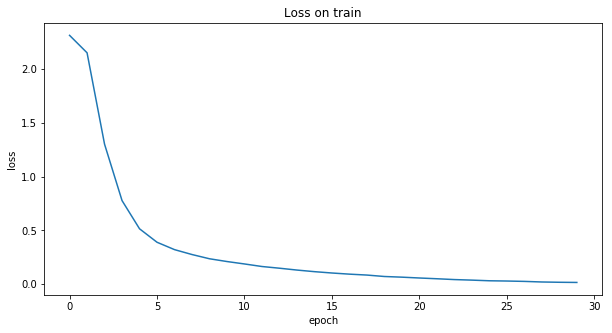

In [65]:
sigmoid_cnn.plot_epochs_loss()

### Tanh activation

In [66]:
tanh_cnn = CNN(activation='tanh')

In [67]:
tanh_cnn.train(mnist_X_train, mnist_y_train, 30, 100, verbose=1, optimizer='adam')

Epoch 1/30
7000/7000 [==============================] - 6s 787us/step - loss: 0.5215
Epoch 2/30
7000/7000 [==============================] - 4s 596us/step - loss: 0.1241
Epoch 3/30
7000/7000 [==============================] - 4s 596us/step - loss: 0.0547
Epoch 4/30
7000/7000 [==============================] - 4s 624us/step - loss: 0.0265
Epoch 5/30
7000/7000 [==============================] - 5s 695us/step - loss: 0.0132
Epoch 6/30
7000/7000 [==============================] - 4s 632us/step - loss: 0.0078
Epoch 7/30
7000/7000 [==============================] - 4s 609us/step - loss: 0.0053
Epoch 8/30
7000/7000 [==============================] - 4s 633us/step - loss: 0.0039
Epoch 9/30
7000/7000 [==============================] - 4s 620us/step - loss: 0.0031
Epoch 10/30
7000/7000 [==============================] - 4s 615us/step - loss: 0.0025
Epoch 11/30
7000/7000 [==============================] - 4s 616us/step - loss: 0.0021
Epoch 12/30
7000/7000 [==============================] - 4s 620

In [68]:
tanh_cnn.test(mnist_X_test, mnist_y_test)

Accuracy for class 0: 0.9943333333333333
Accuracy for class 1: 0.995
Accuracy for class 2: 0.994
Accuracy for class 3: 0.9976666666666667
Accuracy for class 4: 0.9953333333333333
Accuracy for class 5: 0.9916666666666667
Accuracy for class 6: 0.994
Accuracy for class 7: 0.9953333333333333
Accuracy for class 8: 0.9953333333333333
Accuracy for class 9: 0.992


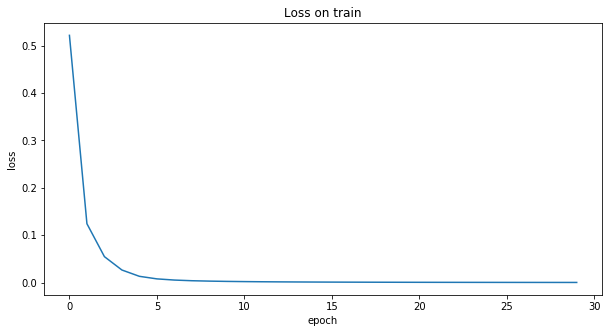

In [69]:
tanh_cnn.plot_epochs_loss()

### Relu activation

In [76]:
relu_cnn = CNN(activation='relu')

In [77]:
relu_cnn.train(mnist_X_train, mnist_y_train, 30, 100, verbose=0)

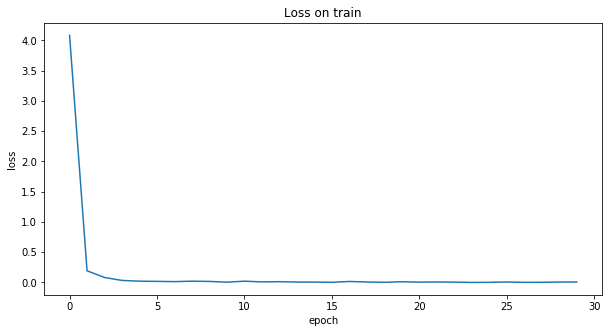

In [78]:
relu_cnn.plot_epochs_loss()

In [79]:
relu_cnn.test(mnist_X_test, mnist_y_test)

Accuracy for class 0: 0.9916666666666667
Accuracy for class 1: 0.9926666666666667
Accuracy for class 2: 0.9943333333333333
Accuracy for class 3: 0.996
Accuracy for class 4: 0.9943333333333333
Accuracy for class 5: 0.9903333333333333
Accuracy for class 6: 0.995
Accuracy for class 7: 0.994
Accuracy for class 8: 0.994
Accuracy for class 9: 0.9883333333333333


# 4. CNN for notMNIST

In [105]:
class CNNLetters():
    def __init__(self, letters_labels):
        self.__letters_labels = letters_labels
        self.__model = Sequential()
        self.__history = None
        
    def train(self, X, y, n_epoch, batch_size, verbose=0, optimizer='rmsprop'):
        self.__init_model(X[0].shape)
        self.__model.compile(optimizer=optimizer,
                             loss='categorical_crossentropy')
        self.__history = self.__model.fit(X, y, epochs=n_epoch, batch_size=batch_size,
                                         verbose=verbose)
        
    def __init_model(self, shape):
        self.__model.add(Conv2D(8, kernel_size=5, activation='tanh', 
                               input_shape=shape))
        self.__model.add(Conv2D(8, kernel_size=3, activation='tanh'))
        self.__model.add(Flatten())
        for _ in range(2):
            self.__model.add(Dense(64, activation='sigmoid'))
        self.__model.add(Dense(10, activation='softmax'))
        
    def plot_epochs_loss(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.__history.epoch, self.__history.history['loss'])
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title('Loss on train')
        plt.show()
        
    def test(self, X, y):
        predict = self.__model.predict(X)
        true_classes = np.argmax(y, axis=1)
        pred_classes = np.argmax(predict, axis=1)
        
        for c in np.unique(true_classes):
            print(f'Accuracy for letter {self.__letters_labels[c]}: '
                  f'{accuracy_score(true_classes == c, pred_classes == c)}')

In [102]:
letters_X_train, letters_X_test, letters_y_train, letters_y_test = train_test_split(not_mnist_X, not_mnist_y,
                                                                            shuffle=True,
                                                                            test_size=0.3,
                                                                            stratify=np.argmax(not_mnist_y, axis=1))

In [106]:
cnn_letters = CNNLetters(letters_labels=letters)

In [ ]:
cnn_letters.train(letters_X_train, letters_y_train, n_epoch=10, batch_size=100, verbose=1,
                  optimizer='adadelta')

Epoch 1/10
13106/13106 [==============================] - 7s 562us/step - loss: 1.4054
Epoch 2/10
13106/13106 [==============================] - 6s 449us/step - loss: 0.6298
Epoch 3/10
13106/13106 [==============================] - 6s 447us/step - loss: 0.4297
Epoch 4/10
13106/13106 [==============================] - 6s 445us/step - loss: 0.3487
Epoch 5/10
13106/13106 [==============================] - 7s 533us/step - loss: 0.2934
Epoch 6/10
12400/13106 [===========================>..] - ETA: 0s - loss: 0.2556